# 7. Visualization with ggplot2

The `ggplot2` package is another useful package in the tidyverse. Statisticians use visualizations to communicate key findings and results in a compelling format. We will learn about the three main components in a ggplot object and then expand on that format by learning more about the different layers we can use. As with the tidyverse functions, there are quite a few functions to cover and the functions build on each other. 

The three packages we will use in this chapter are `tidyverse`, `RforHDSdata`, and `patchwork`. The package `patchwork` is a nice package for combining multiple plots together into a single figure. We will use the data from the Pittsburgh pain clinic introduced in Chapter 2 to create our visuals. You can refresh your memory about this data by reading the data documentation. For the purposes of this chapter, we will take a sample of 5,000 patients from this data and use only those rows that are complete cases at baseline.

In [1]:
library(tidyverse)
library(RforHDSdata)
library(patchwork)
data(pain)

# sampling data
set.seed(5)
pain_df <- pain[complete.cases(subset(pain, select=-c(PAIN_INTENSITY_AVERAGE.FOLLOW_UP))), ]
pain_df <- pain_df[sample(1:nrow(pain_df), 5000, replace=FALSE),] 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Intro to ggplot

We'll begin with a scatter plot in `ggplot2` to introduce the three key elements of a `ggplot2` object. We will create a scatter plot of a patient's depression vs anxiety score. To start a graph, we can use the `ggplot()` function to create a `ggplot` object as below. Note that this brings up a gray box - this will be the base that we build up from. 

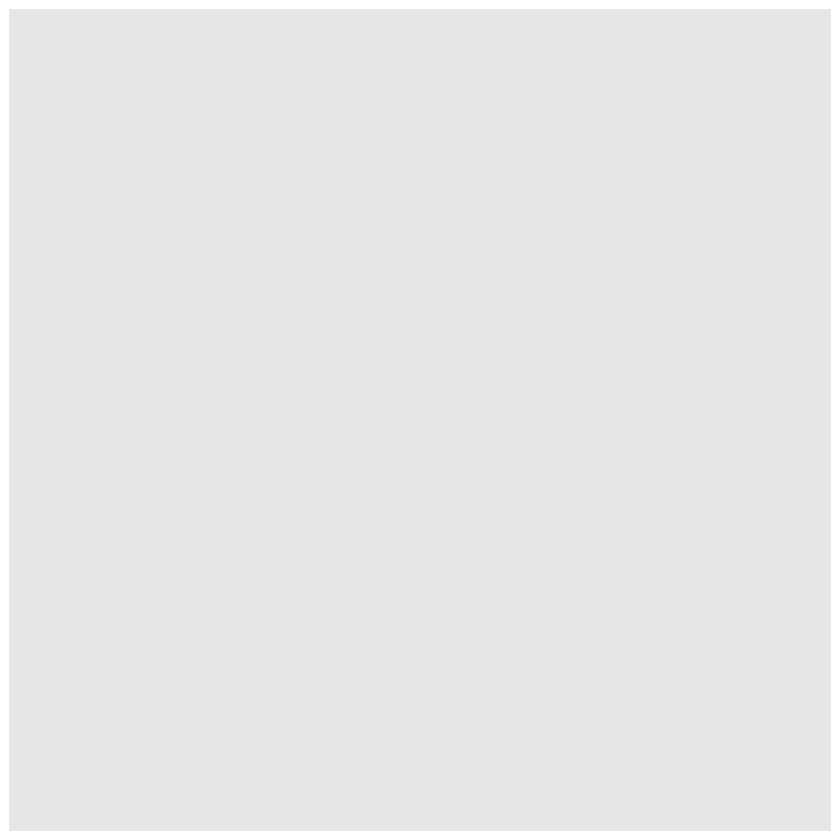

In [2]:
ggplot()

Now we can start adding layers to our `ggplot` object. We start by adding the data as an argument to our first `ggplot()` function. This passes the data on to any future layers. One type of layer is a **geom**. These layers create a geometric object. Below, we use the `geom_point()` to add a scatter plot layer. Within this function, we need to tell the **geom** how to use the data to create the scatter plot through the `aes()` function which creates an **aesthetic**. For a scatter plot, we need to at least specify the x-axis and y-axis in the aesthetic. The image shows a fairly linear relationship between anxiety and depression.

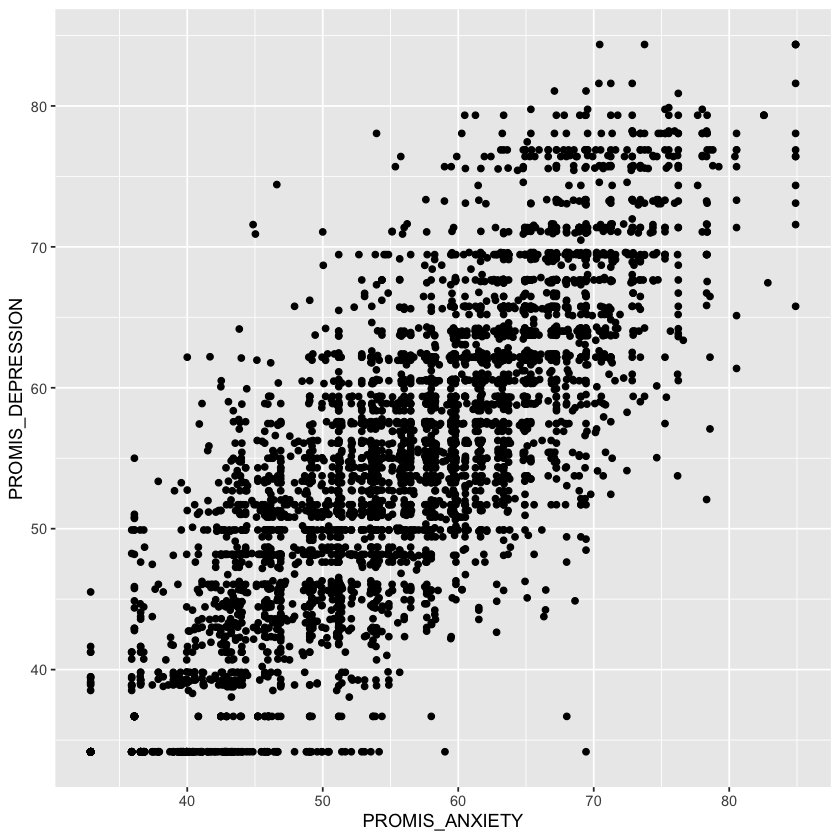

In [3]:
ggplot(pain_df)+geom_point(aes(x=PROMIS_ANXIETY, y = PROMIS_DEPRESSION))

If we want to improve our plot, we may want to add different labels and a title. To do so, we use the `labs()` function to add a layer in which we can specify all labels. Additionally, I have passed more information to the geometry layer by changing the color and size. These two things are specified outside of the `aes()` function since they do not come from the data - every point has the same color and size. 

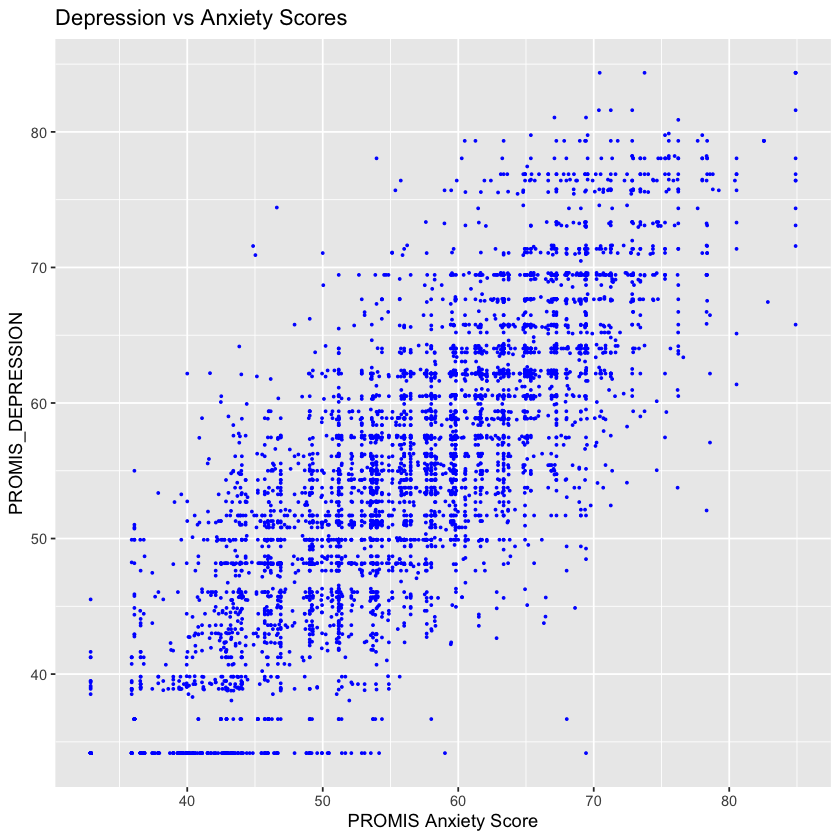

In [4]:
ggplot(pain_df)+
  geom_point(aes(x=PROMIS_ANXIETY, y = PROMIS_DEPRESSION), color="blue", size=0.4) + 
  labs(x="PROMIS Anxiety Score", ylab="PROMIS Depression Score", title = "Depression vs Anxiety Scores")

Let's create another example. This time, I will create a histogram for initial recorded pain level. To find the corresponding geom for the type of plot we'd like to make, we can use the [data visualization cheat sheet from Posit]( https://posit.co/wp-content/uploads/2022/10/data-visualization-1.pdf). The first page lists all the geom options available along with what aesthetics we can set. For example, we are interested in plotting the distribution of one continuous variable. Under the `geom_histogram()` function we can see that we can specify `x` (the variable whose distribution we want to plot) as well as `binwidth`, `y`, `alpha`, `color`, `fill`, `linetype`, `size`, and `weight`. By default the `y` value in a histogram is the count for each bin.

TODO: image of cheat sheet

In the code below, you can see that we updated the color (`color`), fill (`fill`), and opacity (`alpha`) of our histogram bars and updated the number of bins to be 11 (to account for the possible values 0-10). Additionally, we used the `theme_minimal()` function to change the background colors used. You can find the available themes on the second page of the cheat sheet. Try changing the theme to `theme_bw()`. 

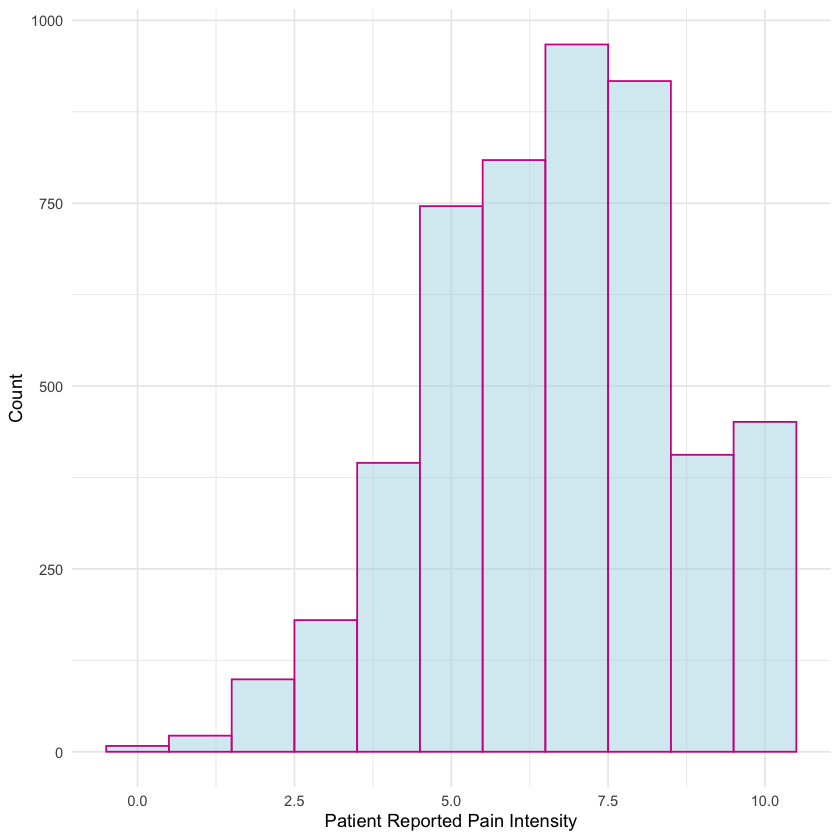

In [5]:
ggplot(pain_df)+
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE), color="violetred", fill="lightblue", alpha=0.5, bins = 11) +
  labs(x="Patient Reported Pain Intensity", y="Count")+
  theme_minimal()

## Adjusting the Axes and Aesthetics

For every part of the aesthetic used in a plot, we have control over how these values are displayed. We will start with the function above. These are controled using **scale** functions. Suppose that I wanted to update the plot above. In particular, I first want to update the x-axis to display all the values 0 to 10. To update the x-axis, I need to find the corresponding scale function for x with continuous values. This function is `scale_x_continuous()`. This function allows me to specify the limits (`limits`), breaks (`breaks`), and labels (`labels`). The scale functions can be found on the second sheet of the cheat sheet. In this case, I just want to update the breaks to be all values 0 to 10. 

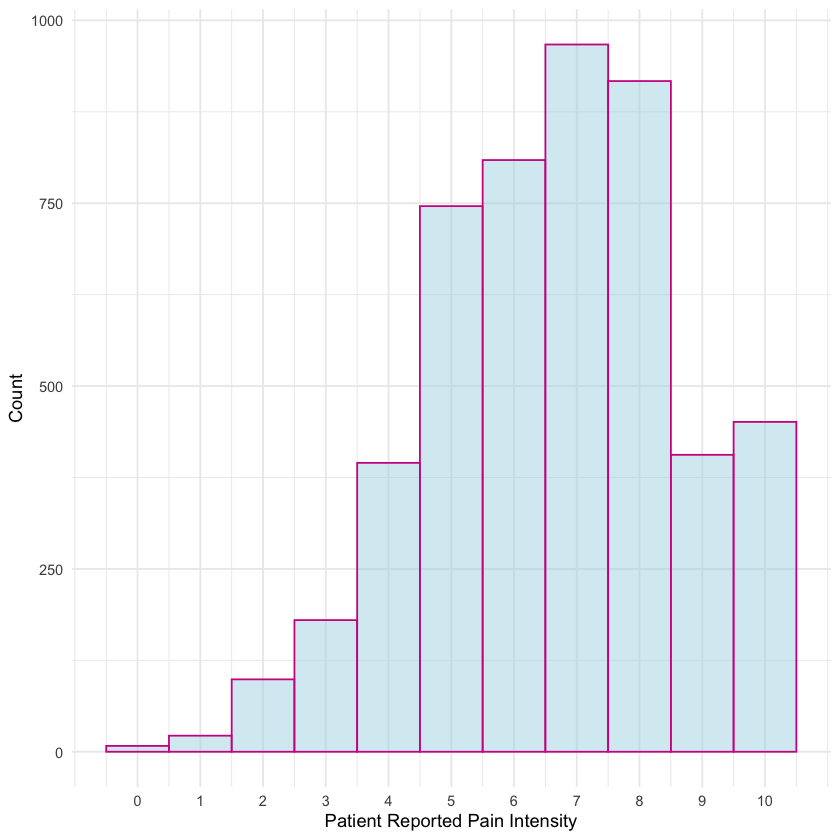

In [6]:
ggplot(pain_df)+
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE), color="violetred", fill="lightblue", alpha=0.5, bins = 11) +
  labs(x="Patient Reported Pain Intensity", y="Count")+
  scale_x_continuous(breaks=0:10)+
  theme_minimal()

Now, let's take a more complex example. The plot below shows the reported sleep disturbance vs physical function and colors each point by the reported pain intensity. Since some points might overlap in values we added `position="jitter"` to the `geom_point()` function to jitter the points. As it stands, this plot is difficult to read. For example, the color of pain intensity makes it hard to see how pain changes and the legend title needs to be simpler.  

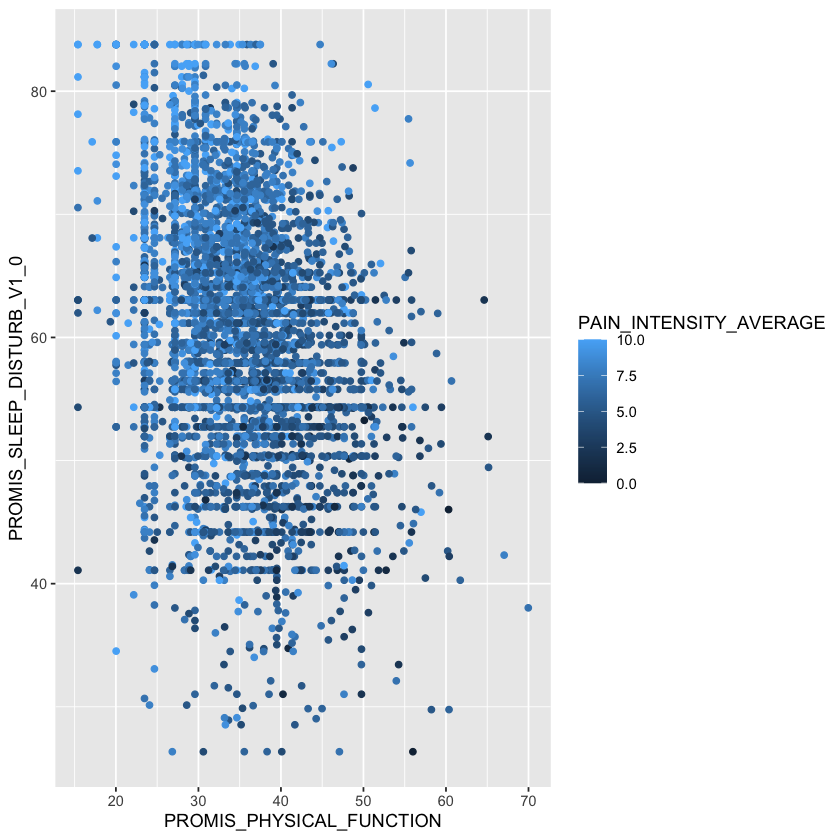

In [7]:
ggplot(pain_df)+
  geom_point(aes(x=PROMIS_PHYSICAL_FUNCTION, y=PROMIS_SLEEP_DISTURB_V1_0, color=PAIN_INTENSITY_AVERAGE), 
             position="jitter")

Suppose that we wanted to visualize the pain intensity and sleep disturbance for patients with below average physical function. Note that both sleep disturbance and physical function are reported as T-Scores, meaning that the raw scores have been converted to a standardized score with mean 50 and standard deviation 10 within the population. We can use the scale functions to update our axes and labels to reflect this information. As before, we need to use the `scale_x_continuous()` function to update the x-axis for a continuous variable. In this case, we update the limits (to restrict to below average physical function), breaks, and labels. We similarly update the y-axis. 

Last, we want to update the color aesthetic. As before, this aesthetic corresponds to a continuous variable. The cheat sheet provides several possible scale functions depending on how we want to specify the color gradient. We choose the `scale_color_gradient()` function since this allows us to specify the low and high end colors. We can also specify the breaks for the legend values similar to on the x and y axes. The argument `name` also allows us to rename this legend. The palette then converts this to a continuous color gradient. The functions `scale_color_gradient2()` and `scale_color_gradientn()` allow you to specify more color points in the gradient. 

Note that this time we received a warning message. This is because our axis limits have cut off some points. To avoid this message we could use the function `coord_cartesian()` to specify our limits which clips the values rather than removing points outside the limits. 

Warning message:
“Removed 121 rows containing missing values (`geom_point()`).”


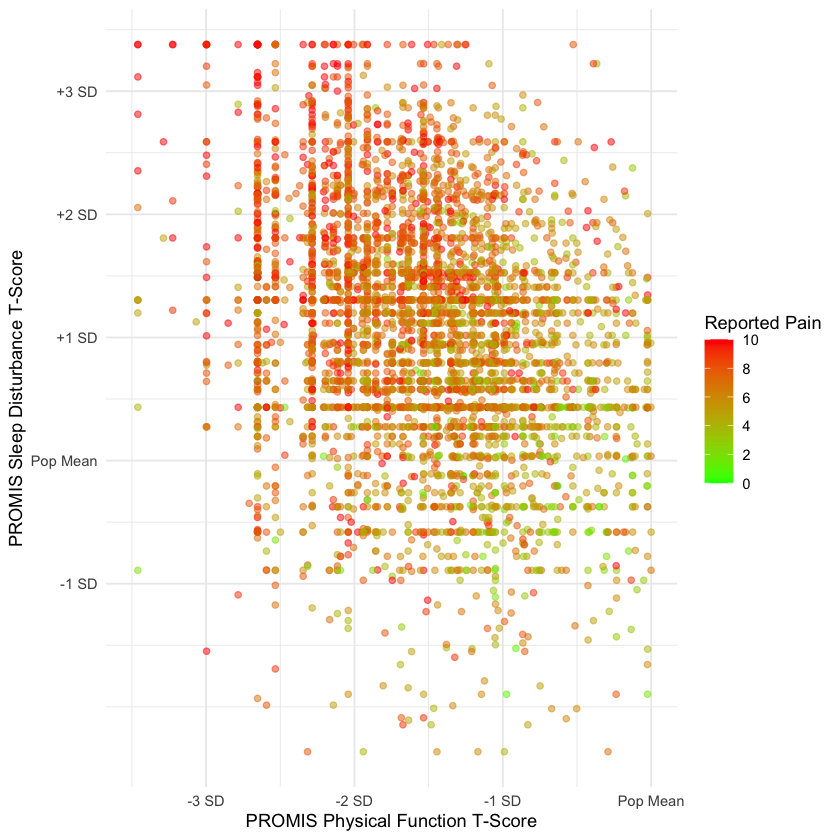

In [8]:
ggplot(pain_df)+
  geom_point(aes(x=PROMIS_PHYSICAL_FUNCTION, y=PROMIS_SLEEP_DISTURB_V1_0, color=PAIN_INTENSITY_AVERAGE), 
             position="jitter", alpha=0.5) +
  scale_x_continuous(limits=c(15,50), breaks = c(20, 30, 40, 50), labels = c("-3 SD", "-2 SD", "-1 SD", "Pop Mean")) + 
  scale_y_continuous(breaks = c(40, 50, 60, 70, 80), labels = c("-1 SD", "Pop Mean", "+1 SD", "+2 SD", "+3 SD")) +
  scale_color_gradient(breaks= seq(0,10,2), low="green", high="red", "Reported Pain") +
  labs(x="PROMIS Physical Function T-Score", y = "PROMIS Sleep Disturbance T-Score") + 
  theme_minimal()

We now demonstrate the scale functions for discrete variables. In the example below, we first create a new race variable that as three categories since other groups have limited observations. We then create a box plot for pain intensity by race. There are two discrete aesthetics here: color and the y-axis. The function `scale_y_continuous()`

In [9]:
pain_df$PAT_RACE_CAT <- as.factor(ifelse(pain_df$PAT_RACE %in% c("BLACK", "WHITE"), pain_df$PAT_RACE, "OTHER"))

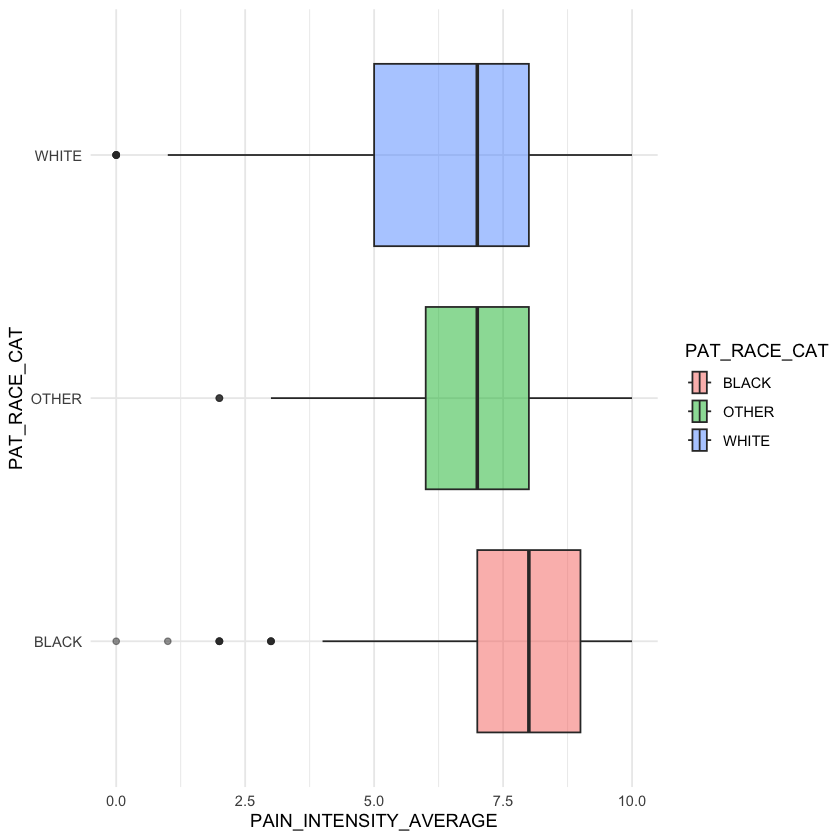

In [10]:
ggplot(pain_df)+
  geom_boxplot(aes(y=PAT_RACE_CAT, x=PAIN_INTENSITY_AVERAGE, fill=PAT_RACE_CAT), alpha=0.5) +
  theme_minimal()

 The function `scale_y_discrete()` is the scale function that corresponds to a discrete y-axis. In this case, we want to update the order and labels. To update the order we could either refactor the variable using `factor()`, specifying the levels, or we can use the `limits` argument to the scale function. The function `scale_fill_brewer()` is a scale function to control the color palette of a discrete variable used for the fill aesthetic. We use this function to specify the [color palette](https://r-graph-gallery.com/38-rcolorbrewers-palettes.html) (`palette`) and to specify that that we do not want a legend (`guide`). Since we do not have a legend, we do not update the values and labels.

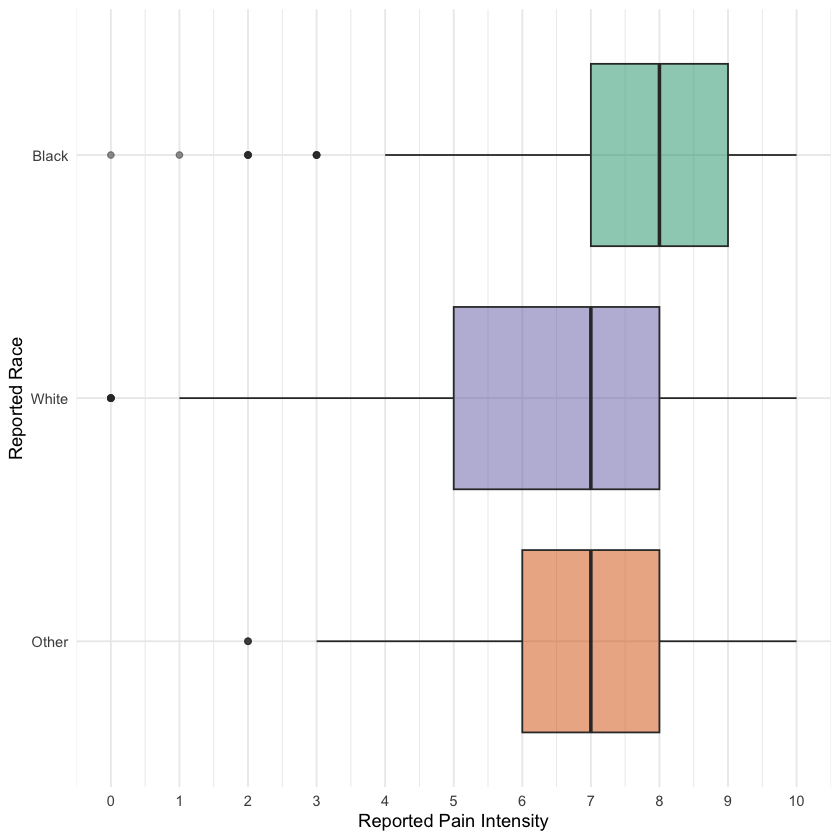

In [11]:
ggplot(pain_df)+
  geom_boxplot(aes(y=PAT_RACE_CAT, x=PAIN_INTENSITY_AVERAGE, fill=PAT_RACE_CAT), alpha=0.5) +
  scale_x_continuous(breaks=c(0:10)) +
  scale_y_discrete(limits=c("OTHER", "WHITE", "BLACK"), labels=c("Other", "White", "Black")) +
  scale_fill_brewer(palette="Dark2", guide="none") +
  labs(x="Reported Pain Intensity", y="Reported Race") +
  theme_minimal()

Let's do another example of using the scale functions. Take a look at the code below. We used two `geom_histogram()` calls to find the histogram of pain at baseline and follow-up. We also specified the fill to be by "Baseline" and "Follow-up" within the aesthetic even though this isn't a column in the data. In this case, we are creating a manual way to color the bars. We use the `scale_fill_manual()` function to then specify the colors we want to use for these two categories using hte `values` argument. We received three warnings when creating this function! This is because we have many NA values for follow-up and we did not specify the bin size for either histogram. C'est la vie. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Warning message:
“Removed 3604 rows containing non-finite values (`stat_bin()`).”


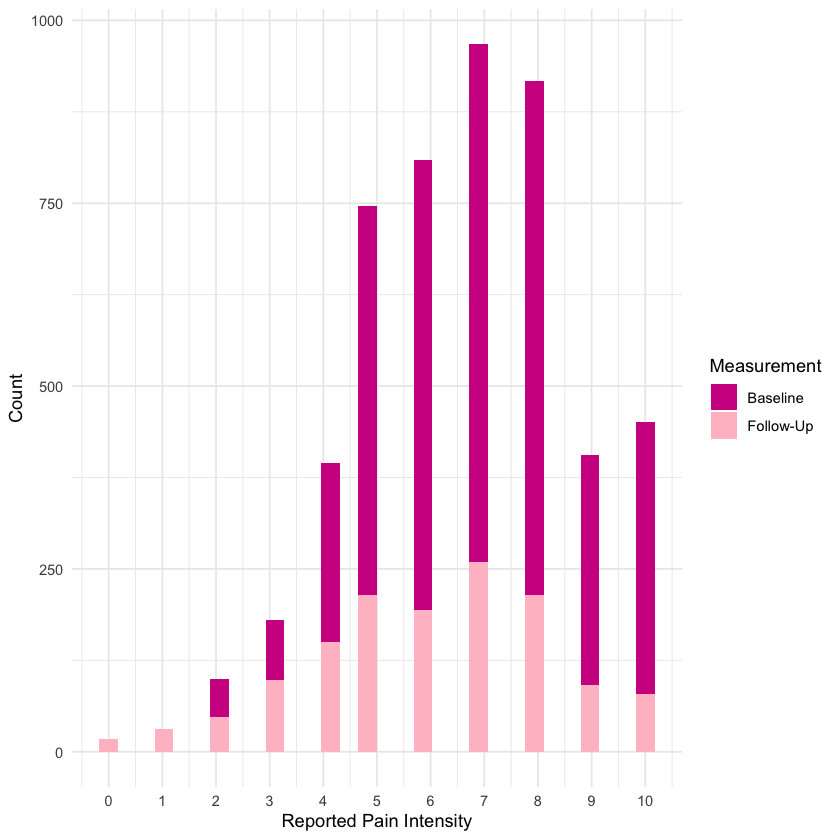

In [12]:
ggplot(pain_df)+
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE, fill="Baseline")) +
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE.FOLLOW_UP, fill="Follow-Up")) +
  scale_x_continuous(breaks=c(0:10)) + 
  scale_fill_manual(values=c("violetred", "pink"), name="Measurement") +
  labs(x="Reported Pain Intensity", y = "Count") +
  theme_minimal()

## Adding Groups

In the example above, we created two histograms using two calls to the `geom_histogram()` function. Another way to create multiple layers is if we have a variable we want to separate the geom layer on. For example, suppose we want to visualize the distribution of physical function by whether someone has follow-up information. Below we create the variable `HAS_FOLLOW_UP` before using it in our aesthetic for `geom_density()` as both the color and group. In fact, we do not have to add the `group` argument because as soon as we specify to color by this variable, R will create the grouping. We update the legend for this grouping using the `scale_color_discrete()` function since the discrete variable `HAS_FOLLOW_UP` specifies the color. 

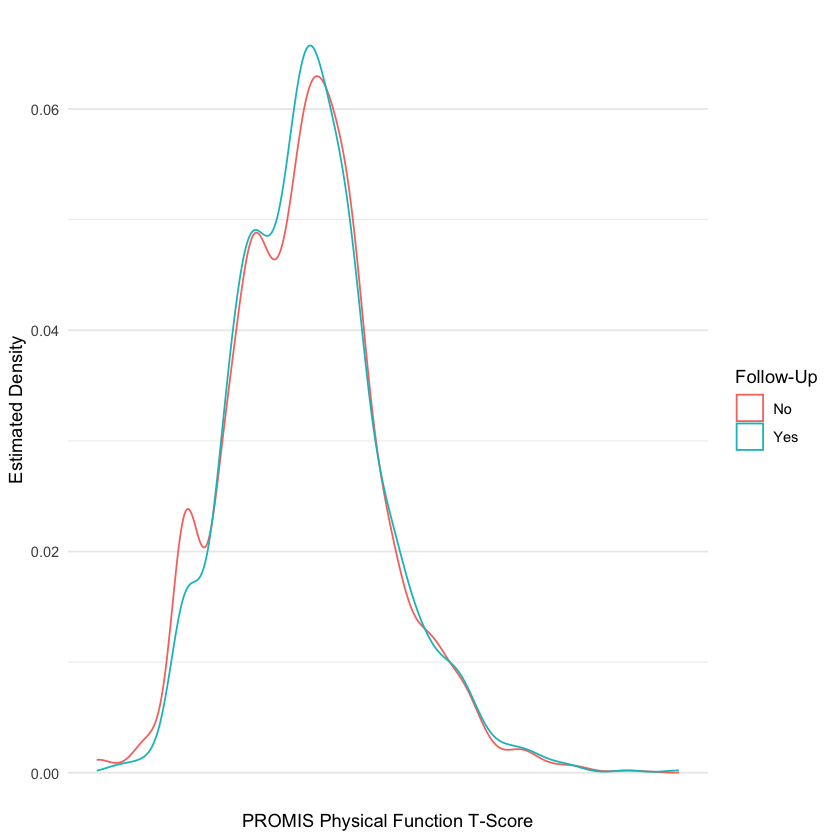

In [13]:
pain_df$HAS_FOLLOW_UP <- !is.na(pain_df$PAIN_INTENSITY_AVERAGE.FOLLOW_UP)
ggplot(pain_df)+
  geom_density(aes(x=PROMIS_PHYSICAL_FUNCTION, group=HAS_FOLLOW_UP, color=HAS_FOLLOW_UP)) +
  scale_x_continuous(breaks=c(0:10)) + 
  scale_color_discrete(name="Follow-Up", labels = c("No", "Yes")) +
  labs(x="PROMIS Physical Function T-Score", y="Estimated Density") +
  theme_minimal()

Let's try another example. Suppose that we want to find the distribution of initial overall pain by those that do and do not have follow up. In this case, we want to plot the proportion for each pain score for each group rather than comparing counts. We first need to find these proportions. We do so by grouping and summarizing over our data. 

We can now use the `geom_col()` function to create a bar plot of the proportions. By default, this function will stack the bars on top of each other when there is grouping. We add `position="dodge"` to place them side by side. 

In [14]:
ggplot(pain_df_grp)+
  geom_col(aes(x=PAIN_INTENSITY_AVERAGE, y=prop, fill=HAS_FOLLOW_UP), position="dodge") +
  scale_x_continuous(breaks=c(0:10)) + 
  scale_fill_discrete(name="Seen at Follow Up", labels=c("No", "Yes")) +
  labs(x="Reported Pain Intensity", y = "Proportion") +
  theme_minimal()

ERROR: Error in eval(expr, envir, enclos): object 'pain_df_grp' not found


Another way to visualize by group is by adding a facet wrap. Facets divide a plot into subplots based on one or more discrete variable values. We can either arrange these plots as a grid where the rows and/or columns correspond to variables we are grouping by or wrap the plots into a rectangular format. Below, we take a previous plot and add a facet grid by race.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3604 rows containing non-finite values (`stat_bin()`).”


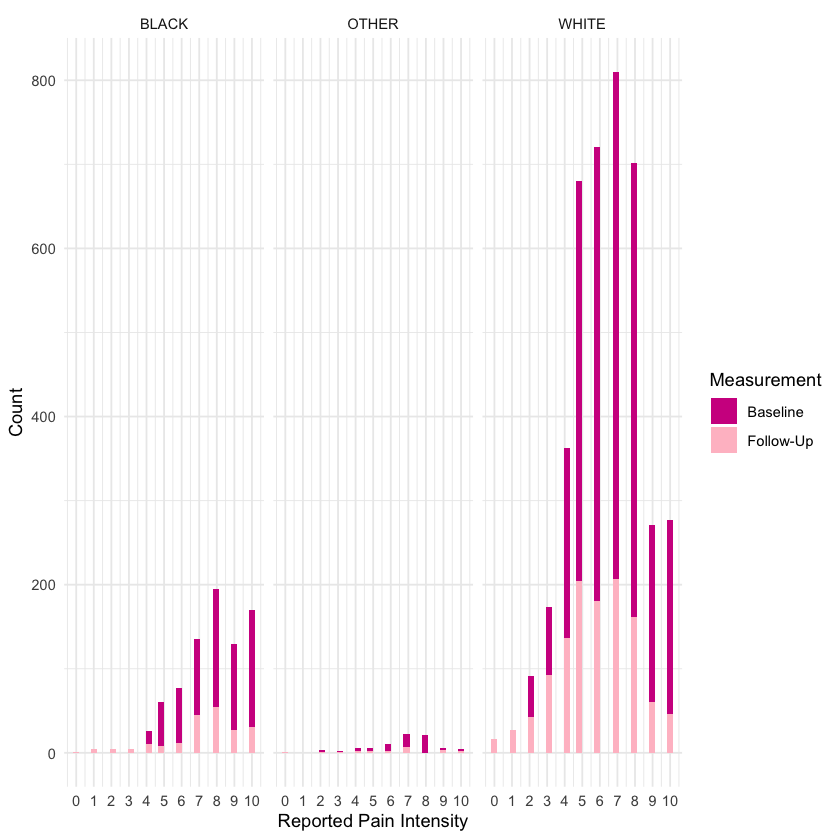

In [81]:
ggplot(pain_df)+
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE, fill="Baseline")) +
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE.FOLLOW_UP, fill="Follow-Up")) +
  scale_x_continuous(breaks=c(0:10)) + 
  scale_fill_manual(values=c("violetred", "pink"), name="Measurement") +
  labs(x="Reported Pain Intensity", y = "Count") +
  facet_grid(col=vars(PAT_RACE_CAT))+
  theme_minimal()

## Extra Options

To create our final plot, we will demonstrate some extra features we haven't covered so far. To create this plot, we first find the number of participants who selected each body region and the average pain intensity for those patients. We also classify each body part region into larger groups. 

In [136]:
pain_body_map <- data.frame(part = names(pain_df)[2:75])
pain_body_map$num_patients <- colSums(pain_df[,2:75])
pain_body_map$perc_patients <- pain_body_map$num_patients/nrow(pain_df)
pain_body_map$avg_pain <- colSums(pain_df[,2:75] * pain_df$PAIN_INTENSITY_AVERAGE)/pain_body_map$num_patients
pain_body_map$region <- case_when(
    pain_body_map$part %in% c("X208", "X209", "X218","X219","X212","X213") ~ "Back",
    pain_body_map$part %in% c("X105", "X106", "X205","X206") ~ "Neck",
    pain_body_map$part %in% c("X107", "X110", "X207","X210") ~ "Shoulders",
    pain_body_map$part %in% c("X108","X109","X112","X113") ~ "Chest/Abs",
    pain_body_map$part %in% c("X126","X127","X228","X229","X131","X132","X233","X234")~"Legs",
    pain_body_map$part %in% c("X111","X114","X211","X214","X115","X116","X117","X118","X217","X220")~"Arms",
    pain_body_map$part %in% c("X119","X124","X221","X226","X125","X128","X227","X230")~"Wrists/Hands",
    pain_body_map$part %in% c("X215","X216")~"Elbows",
    pain_body_map$part %in% c("X135","X136","X237","X238","X133","X134","X235","X236")~"Feet/Ankles",
    pain_body_map$part %in% c("X129","X130","X231","X232")~"Knees",
    pain_body_map$part %in% c("X101","X102","X103","X104","X201","X203","X202","X204")~"Head",
    pain_body_map$part %in% c("X120","X121","X122","X123","X222","X223","X224","X225")~"Hips")
    
head(pain_body_map)

,part,num_patients,perc_patients,avg_pain,region
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,X101,323,0.0646,6.693498,Head
2,X102,322,0.0644,6.819876,Head
3,X103,165,0.0330,6.860606,Head
4,X104,165,0.0330,6.951515,Head
5,X105,493,0.0986,6.904665,Neck
6,X106,507,0.1014,6.921105,Neck


Within the theme we've chosen, we are able to update any of the [theme options](https://ggplot2.tidyverse.org/reference/theme.html). Below we use the `theme()` function to update the legend position to the bottom and the grid lines to light pink. Additionally, I add a horizontal line using the `geom_hline()` function (there are also functions for vertical or other lines) and add a text annotation using the `annotate()` function. These show the average pain value for a body part.

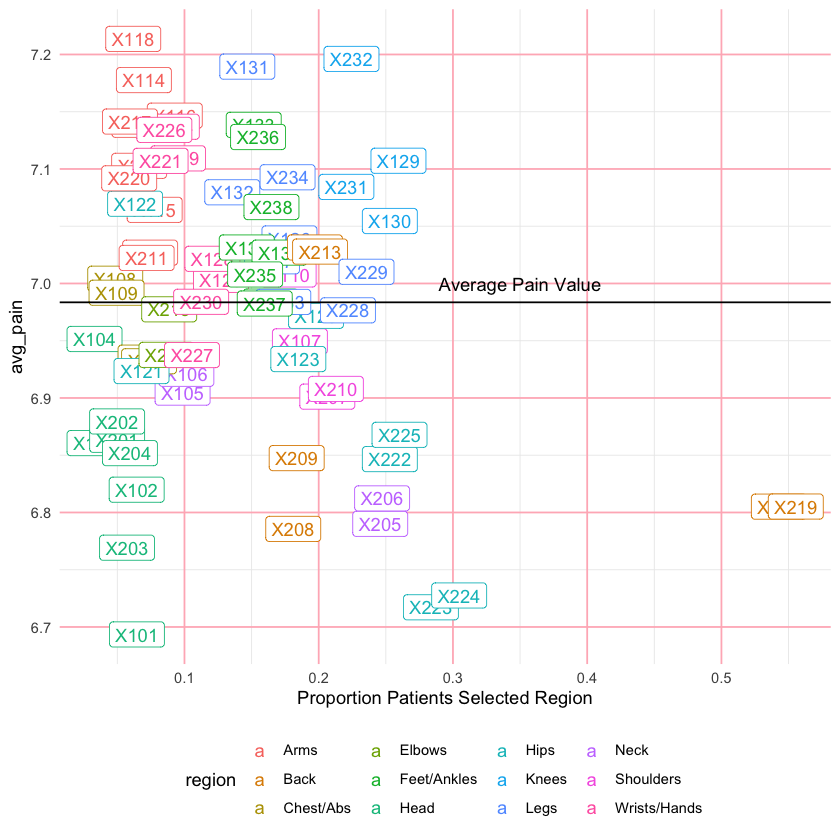

In [142]:
ggplot(pain_body_map) +
  geom_label(aes(x=perc_patients, y=avg_pain, label=part, color=region)) + 
  geom_hline(yintercept=mean(pain_body_map$avg_pain)) +
  annotate(geom="text", label="Average Pain Value", x=0.35, y=7.0) + 
  labs(x="Proportion Patients Selected Region", "Average Pain of Patients") +
  theme_minimal()+
  theme(legend.position="bottom", panel.grid.major = element_line(colour = "lightpink"))

So far we have not saved any of our figures as objects. Below I create two plots `p1` and `p2`. If we want to save our images, we can use the `ggsave()` function, which saves the last plot generated under the file name provided. Additionally, I can use the `patchwork` package to incorporate multiple plots together. A `+` between plots puts them side by side wheras `/` stacks them. 

In [149]:
p1 <- ggplot(pain_body_map) +
  geom_label(aes(x=perc_patients, y=avg_pain, label=part, color=region)) + 
  geom_hline(yintercept=mean(pain_body_map$avg_pain)) +
  annotate(geom="text", label="Average Pain Value", x=0.35, y=7.0) + 
  labs(x="Proportion Patients Selected Region", "Average Pain of Patients") +
  theme_minimal()+
  theme(legend.position="bottom", panel.grid.major = element_line(colour = "lightpink"))

p2 <- ggplot(pain_body_map) +
  geom_histogram(aes(x=perc_patients), color="violetred", fill="lightpink") + 
  labs(x="Proportion of Patients Selected Region", "Count") +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = "lightpink"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


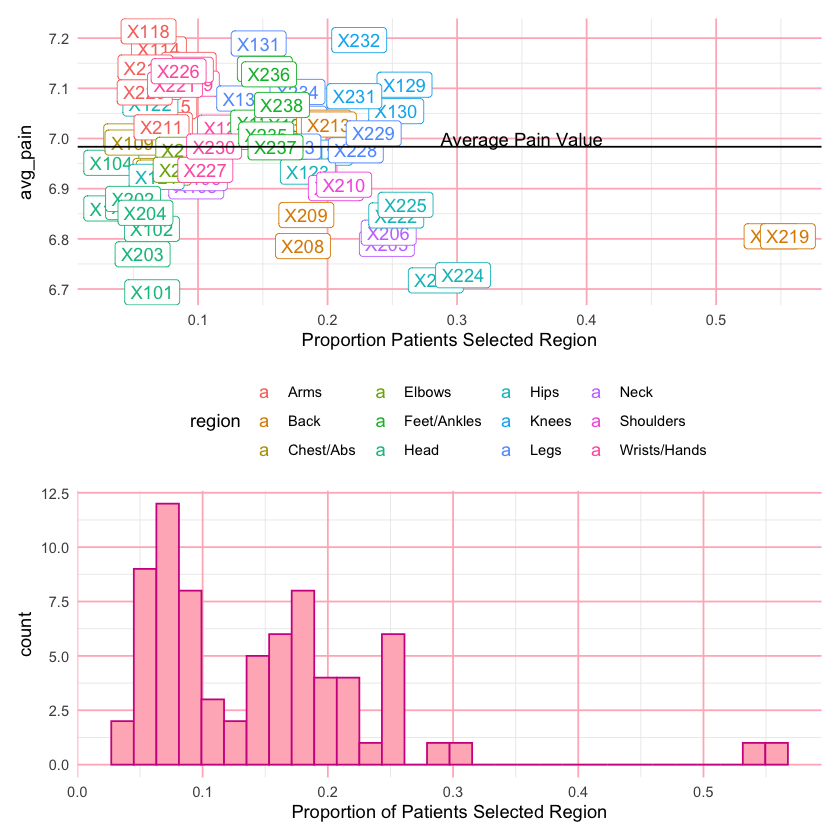

In [150]:
p1/p2

In [151]:
ggsave("myplot.png") 

Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


VIDEO:

Emphasize where to find things
The `geom` layers all have to do with displaying data points on the graph. 
The `scale` functions correspond to changing how an aspect of the graph is displayed. For example, `scale_color_continuous` would specify how to display colors that are used on a continuous scale. On the other hand, `scale_x_discrete` would specify how to display the x-axis when x is discrete. 
Last, the `theme` and `annotate` functions help to finetune the display. 
Warnings are not errors.

Percentages using stat and position dodge

## Exercises

Plot the percentage observed at follow-up for each body part